In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [0]:
# Build the Sequential feedforward neural network model

model = Sequential([
                    Flatten(input_shape=(28,28), name='input_layer'),
                    Dense(32, activation='relu', name='hidden_layer1'),
                    Dense(10, activation='softmax', name='output_layer')
])

In [6]:
# Print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                25120     
_________________________________________________________________
output_layer (Dense)         (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [0]:
# Build the Sequential convolutional neural network model

model1 = Sequential([
                    Conv2D(16, kernel_size=3, padding = 'VALID', input_shape=(28,28,1), data_format='channels_last'),
                    MaxPooling2D(pool_size=3),
                    Flatten(),
                    # Dense(32, activation='relu'), # 'tanh', 'elu'
                    Dense(10, activation=tf.nn.softmax)
])

In [95]:
# Print the model summary

model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [0]:
# Define the model optimizer, loss function and metrics

# model.compile(optimizer='adam', # 'adam', 'adadelta', 'rmsprop'
#               loss='binary_crossentropy', # 'mean_squared_error', 'categorical_crossentropy'
#               metrics=['accuracy', 'mae'])

# another way
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True), 
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.7), tf.keras.metrics.MeanSquaredError()])

# another way
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mse = tf.keras.metrics.MeanSquaredError()
model1.compile(optimizer=opt, 
              loss="sparse_categorical_crossentropy",
              metrics=[acc, mse])


In [97]:
# Print the resulting model attributes
print(model1.loss)
print(model1.optimizer)
print(model1.optimizer.lr)
print(model1.metrics)

sparse_categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>
[]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [0]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [0]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [108]:
# Print the shape of the training data
# train_images = train_images.reshape(60000, 28, 28, 1)
# test_images = test_images.reshape(10000, 28, 28, 1)
print(train_images.shape)
print(train_labels.shape)
# train_labels = train_labels.reshape(60000,1)
print(train_labels.shape)

(60000, 28, 28)
(60000,)
(60000,)


In [109]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(labels[train_labels[4]])

T-shirt/top


In [0]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.
test_images = test_images/255.

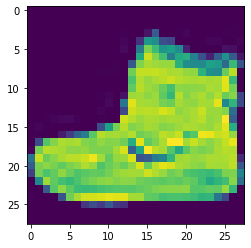

label: Ankle boot


In [111]:
# Display one of the images

i=0
plt.imshow(train_images[i])
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [124]:
# Fit the model

history = model1.fit(train_images[...,np.newaxis], train_labels, epochs=5, batch_size=256, verbose=2)

Epoch 1/5
235/235 - 10s - loss: 0.6278 - sparse_categorical_accuracy: 0.7800 - mean_squared_error: 27.6616
Epoch 2/5
235/235 - 10s - loss: 0.5882 - sparse_categorical_accuracy: 0.7933 - mean_squared_error: 27.6642
Epoch 3/5
235/235 - 10s - loss: 0.5569 - sparse_categorical_accuracy: 0.8054 - mean_squared_error: 27.6661
Epoch 4/5
235/235 - 10s - loss: 0.5326 - sparse_categorical_accuracy: 0.8144 - mean_squared_error: 27.6678
Epoch 5/5
235/235 - 10s - loss: 0.5124 - sparse_categorical_accuracy: 0.8223 - mean_squared_error: 27.6693


#### Plot training history

In [125]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_squared_error
0,0.627827,0.780000,27.661604
1,0.588208,0.793333,27.664227
2,0.556942,0.805400,27.666075
3,0.532620,0.814367,27.667778
4,0.512366,0.822267,27.669329


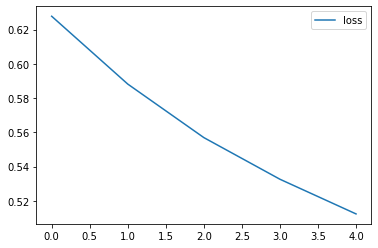

In [126]:
# Make a plot for the loss
df.plot(y='loss')


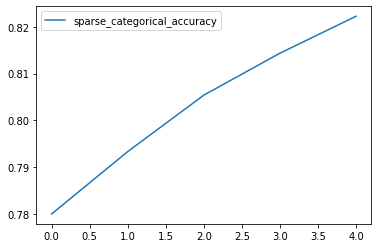

In [127]:
# Make a plot for the accuracy
df.plot(y='sparse_categorical_accuracy')


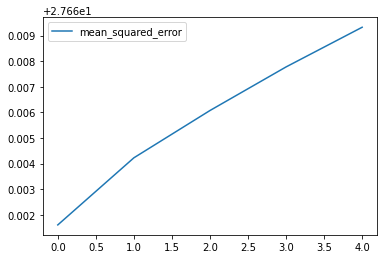

In [128]:
# Make a plot for the additional metric
df.plot(y='mean_squared_error')



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [0]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [130]:
# Evaluate the model
model1.evaluate(test_images[...,np.newaxis], test_labels)


313/313 [==============================] - 2s 5ms/step - loss: 0.5279 - sparse_categorical_accuracy: 0.8122 - mean_squared_error: 27.6693


[0.5279194712638855, 0.8122000098228455, 27.669294357299805]

#### Make predictions from the model

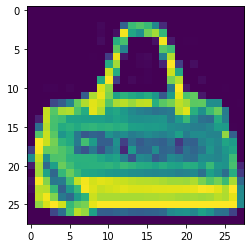

Label: Bag


In [154]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [0]:
test_image.shape
test_image = test_image.reshape(1,28,28,1)

In [156]:
# Get the model predictions

labels[np.argmax(model1.predict(test_image))]

'Bag'